# k-Means Algorithm

## Importing Libraries and Reading Data

In [100]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('kmeans.csv', index_col = 0)

## Define k Means Algorithm

In [101]:
#k_means algorithm
def k_means(k_value,centroid,classarray):
    #empty list
    oldclassified = []
    #full algorithm
    while True:
        classified = []
        #look for shortest distanced centroid and classify
        for j in range (0,len(df)):
            dist = []
            for k in range (0,k_value):
                #since comparing square of distance is the same as comparing the distance
                dist.append((centroid[k,0]-df.iloc[j,0])**2+(centroid[k,1]-df.iloc[j,1])**2)
            classified.append(np.argmin(dist))
        #tests if classification changed
        if oldclassified != classified:
            #find new centroid
            for l in range (0,k_value):
                xtot = 0
                ytot = 0
                numclassified = 0
                for m in range (0,len(df)):
                    if classified[m] == l:
                        xtot += df.iloc[m,0]
                        ytot += df.iloc[m,1]
                        numclassified += 1
                if numclassified != 0:
                    centroid[l,0] = xtot/numclassified
                    centroid[l,1] = ytot/numclassified
                else:
                    centroid[l,0] = random.uniform(0,200)
                    centroid[l,1] = random.uniform(0,200)
            oldclassified = classified
        #exits loop when classification did not change and outputs a list in an array of how each point was classified
        else:
            classarray[k_value-1] = classified
            break

## Finding 'k' Using 'Elbow' Graph and Classifying Points for all 'k'

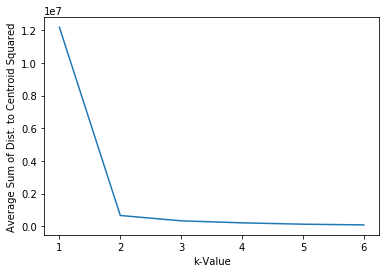

In [134]:
#get random centroid points for up to k=[1,6]
A = np.random.uniform(0,200,(1,2))
B = np.random.uniform(0,200,(2,2))
C = np.random.uniform(0,200,(3,2))
D = np.random.uniform(0,200,(4,2))
E = np.random.uniform(0,200,(5,2))
F = np.random.uniform(0,200,(6,2))

#declare empty arrays
dist = np.zeros((6,4000))
final_class = np.zeros((6,4000), dtype=np.int8)
avg_cluster_size = np.zeros(6)

#loop over each 'k-value'
for i in (A,B,C,D,E,F):
    a,b = np.shape(i)
    k_means(a,i,final_class)
    #calculate cluster sizes to determine optimal 'k-value'
    cluster_size = np.zeros(a)
    for j in range (0,len(df)):
        for k in range (0,a):
            if final_class[a-1,j] == k:
                #sum of the squares of the distances from the points to the centroid
                cluster_size[k] += (i[k,0]-df.iloc[j,0])**2+(i[k,1]-df.iloc[j,1])**2
    #calculate mean of the value found above
    avg_cluster_size[a-1] = np.mean(cluster_size)

#plot 'elbow' graph
plt.plot([1,2,3,4,5,6],avg_cluster_size)
plt.ylabel('Average Sum of Dist. to Centroid Squared')
plt.xlabel('k-Value')
plt.show()

After plotting the graph of $\sum{\{\text{Dist. to Centroid}\}^2}$ against the k value, we find that the "elbow" lands on $k=2$.

## Plotting Classified Points

Here, we plot classified points where $k=[1,6]$. However, based on our elbow graph, we will choose $k=2$ above all other $k$.

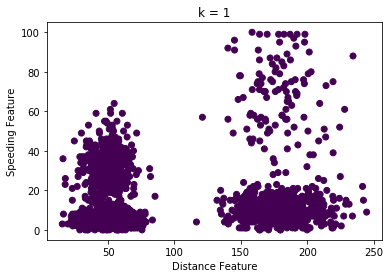

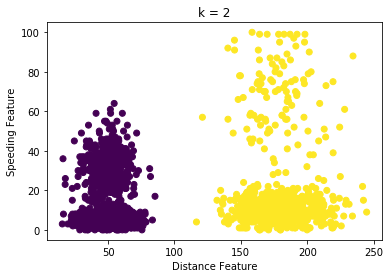

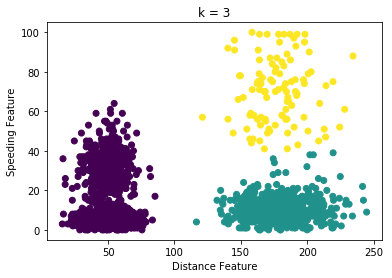

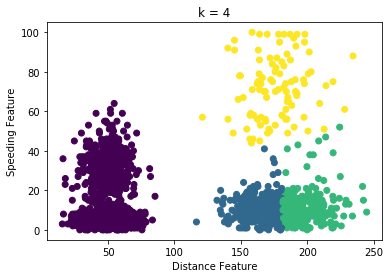

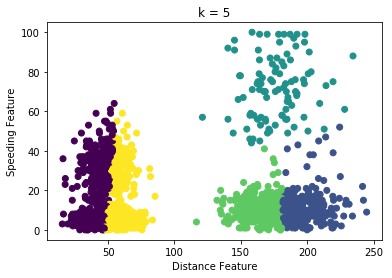

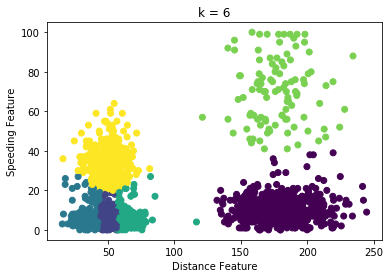

In [135]:
def plot_colour(k_value):
    plt.scatter(df.iloc[:,0], df.iloc[:,1], c=final_class[k_value-1])
    plt.xlabel('Distance Feature')
    plt.ylabel('Speeding Feature')
    plt.title('k = %i' % k_value)
    plt.show()

for k in range (1,7):
    plot_colour(k)